In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from snowflake_config import *

In [2]:
#ODBC -> OPEN DATABASE CONNECTION/CONNECTOR
url_conexion = f"snowflake://{config['user']}:{config['password']}@{config['identificador_cuenta']}/"
motor = create_engine(url_conexion)

In [4]:
try:
    conexion = motor.connect()
except:
    print('La conexion no se pudo dar')

La conexion no se pudo dar


In [3]:
consulta = 'select * from fund_ds.raw.ordenes'
crudo_ordenes = pd.read_sql(consulta, con=motor)

InterfaceError: (snowflake.connector.errors.InterfaceError) 250003 (08001): 404 Not Found: post https://mzb75182.snowflakecomputing.com:443/session/v1/login-request?request_id=2906db97-8228-4f1a-9d14-89e10a8231db&request_guid=f734d310-a536-4bb1-addf-a5344e20f4fd
(Background on this error at: https://sqlalche.me/e/14/rvf5)

In [5]:
crudo_ordenes.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [6]:
crudo_ordenes.query('user_id == 183418')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
236116,566564,183418,23,0,8,9.0
419182,1861906,183418,16,6,10,27.0
428409,642049,183418,25,2,9,6.0


In [7]:
crudo_ordenes.query('user_id == 163593')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,1690866,163593,5,5,12,9.0
136792,60739,163593,17,6,13,9.0
409286,3077764,163593,12,6,7,4.0
449641,2691848,163593,15,3,8,7.0


In [8]:
crudo_ordenes['user_id'].value_counts()

user_id
149605    28
193164    26
78375     25
148162    24
134511    24
          ..
71501      1
187439     1
6845       1
176472     1
34561      1
Name: count, Length: 157437, dtype: int64

In [9]:
crudo_ordenes.query('user_id == 193164').sort_values('order_number')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
240711,192043,193164,5,2,12,4.0
447044,826729,193164,9,2,11,8.0
387419,2051889,193164,12,5,14,3.0
117865,2302763,193164,13,1,10,3.0
308325,3184720,193164,14,5,14,18.0
168505,1204116,193164,16,1,17,3.0
61018,1746856,193164,18,2,12,6.0
35009,1891169,193164,29,2,16,1.0
255039,659377,193164,31,4,10,6.0
117994,2403078,193164,32,5,14,1.0


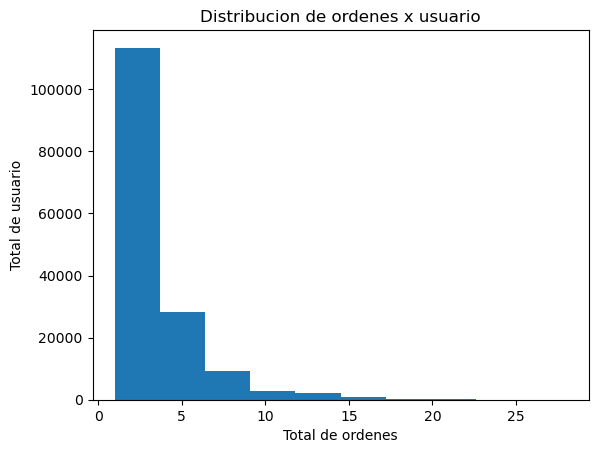

In [10]:
crudo_ordenes['user_id'].value_counts().plot(
    kind='hist',
    title='Distribucion de ordenes x usuario',
    xlabel='Total de ordenes',
    ylabel='Total de usuario'
)
plt.show()

In [11]:
crudo_ordenes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [12]:
crudo_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [13]:
crudo_ordenes[crudo_ordenes.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [14]:
total_repetidos = crudo_ordenes.duplicated().sum()

In [15]:
print(f'El total de filas repetidas es: {total_repetidos}')

El total de filas repetidas es: 15


In [16]:
crudo_ordenes.query('order_id == 1021560')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0


Los datos de ventas / ordenes / facturas presentan un total de 15 filas / ordenes repetidas.

Los datos que me envio el equipo de TI, son una muestra del total de facturas generadas.